In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Set the data directory
data_dir = 'Data'

# Display available files
print("Available files:")
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        print(f"- {file}")

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

Available files:
- Financial crisis.csv
- Global economic crisis.csv
- Interest rate hikes.csv
- Market sentiment.csv
- Recession.csv
- Risk management.csv
- Stock market crash.csv
- vix(2000-2024)(in).csv
- Volatility.csv


In [2]:
# Load VIX data from the cleaned source
vix_path = os.path.join(data_dir, 'vix(2000-2024)(in).csv')
vix_data = pd.read_csv(vix_path)

# Convert Dates to datetime format
vix_data['Dates'] = pd.to_datetime(vix_data['Dates'], format='%m/%d/%Y')

# Rename the column to a more standard name
vix_data = vix_data.rename(columns={'Dates': 'Date'})

# Display basic information
print("VIX data shape:", vix_data.shape)
print("\nVIX data columns:", vix_data.columns.tolist())
print("\nVIX data first 5 rows:")
print(vix_data.head())

# Generate monthly statistics
vix_monthly = vix_data.copy()
vix_monthly['Year_Month'] = vix_monthly['Date'].dt.to_period('M')
vix_monthly_stats = vix_monthly.groupby('Year_Month').agg({
    'PX_OPEN': 'mean',
    'PX_HIGH': 'max',
    'PX_LOW': 'min'
}).reset_index()
vix_monthly_stats['Year_Month'] = vix_monthly_stats['Year_Month'].astype(str)

# Display monthly statistics
print("\nMonthly VIX statistics (first 5 rows):")
print(vix_monthly_stats.head())

VIX data shape: (6308, 4)

VIX data columns: ['Date', 'PX_OPEN', 'PX_HIGH', 'PX_LOW']

VIX data first 5 rows:
        Date  PX_OPEN  PX_HIGH  PX_LOW
0 2000-01-03    24.36    26.15   23.98
1 2000-01-04    24.94    27.18   24.80
2 2000-01-05    27.98    29.00   25.85
3 2000-01-06    26.68    26.71   24.70
4 2000-01-07    25.14    25.17   21.72

Monthly VIX statistics (first 5 rows):
  Year_Month    PX_OPEN  PX_HIGH  PX_LOW
0    2000-01  23.300500    29.00   19.51
1    2000-02  23.536500    28.12   20.69
2    2000-03  22.793043    25.87   19.19
3    2000-04  27.286842    34.31   23.25
4    2000-05  26.585909    32.89   23.23


In [3]:
# Cell 3: Function to properly load Google Trends data
def load_trends_data(file_name):
    file_path = os.path.join(data_dir, file_name)
    
    # Read the file, skipping the first row which contains the category
    df = pd.read_csv(file_path, skiprows=1)
    
    # The first column should be Month, and the second column is the interest value
    # Extract keyword from filename (remove .csv extension)
    keyword = file_name.replace('.csv', '')
    
    # Set proper column names
    df.columns = ['Month', f'{keyword}_Interest']
    
    # Convert Month to datetime
    df['Month'] = pd.to_datetime(df['Month'])
    
    # Add a Year_Month column formatted as YYYY-MM for merging with VIX data
    df['Year_Month'] = df['Month'].dt.strftime('%Y-%m')
    
    return df

# Test the function with one file
test_file = 'Recession.csv'
recession_data = load_trends_data(test_file)
print(f"Test loading {test_file}:")
print(recession_data.head())

Test loading Recession.csv:
       Month  Recession_Interest Year_Month
0 2004-01-01                   4    2004-01
1 2004-02-01                   5    2004-02
2 2004-03-01                   4    2004-03
3 2004-04-01                   5    2004-04
4 2004-05-01                   4    2004-05


In [4]:
# Cell 4: Load all Google Trends datasets
trends_files = [
    'Recession.csv',
    'Financial crisis.csv',
    'Global economic crisis.csv',
    'Interest rate hikes.csv',
    'Market sentiment.csv',
    'Risk management.csv',
    'Stock market crash.csv',
    'Volatility.csv'
]

# Dictionary to store all trends dataframes
all_trends = {}

# Load each file
for file in trends_files:
    keyword = file.replace('.csv', '')
    all_trends[keyword] = load_trends_data(file)
    print(f"Loaded {keyword} data: {len(all_trends[keyword])} rows from {all_trends[keyword]['Month'].min()} to {all_trends[keyword]['Month'].max()}")

# Create a master trends dataframe starting with the first dataset
master_trends = all_trends[trends_files[0].replace('.csv', '')][['Year_Month']].copy()

# Merge all trend interest columns
for keyword, df in all_trends.items():
    master_trends = master_trends.merge(
        df[['Year_Month', f'{keyword}_Interest']], 
        on='Year_Month', 
        how='outer'
    )

# Display the first few rows of the master trends dataframe
print("\nMaster trends dataframe (first 5 rows):")
print(master_trends.head())

Loaded Recession data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Financial crisis data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Global economic crisis data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Interest rate hikes data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Market sentiment data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Risk management data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Stock market crash data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00
Loaded Volatility data: 256 rows from 2004-01-01 00:00:00 to 2025-04-01 00:00:00

Master trends dataframe (first 5 rows):
  Year_Month  Recession_Interest  Financial crisis_Interest  \
0    2004-01                   4                          3   
1    2004-02                   5                          4   
2    2004-03                   4                          6   
3    2004-04  

In [5]:
# Cell 5: Load and prepare VIX data
vix_path = os.path.join(data_dir, 'vix(2000-2024)(in).csv')
vix_data = pd.read_csv(vix_path)

# Convert Dates to datetime
vix_data['Dates'] = pd.to_datetime(vix_data['Dates'], format='%m/%d/%Y')

# Add a Year_Month column for aggregation
vix_data['Year_Month'] = vix_data['Dates'].dt.strftime('%Y-%m')

# Aggregate VIX data by month
vix_monthly = vix_data.groupby('Year_Month').agg({
    'PX_OPEN': 'mean',
    'PX_HIGH': 'max',
    'PX_LOW': 'min'
}).reset_index()

# Calculate VIX monthly average
vix_monthly['VIX_avg'] = (vix_monthly['PX_OPEN'] + vix_monthly['PX_HIGH'] + vix_monthly['PX_LOW']) / 3

# Display the monthly VIX data
print("Monthly VIX data:")
print("Shape:", vix_monthly.shape)
print("\nFirst 5 rows:")
print(vix_monthly.head())

Monthly VIX data:
Shape: (300, 5)

First 5 rows:
  Year_Month    PX_OPEN  PX_HIGH  PX_LOW    VIX_avg
0    2000-01  23.300500    29.00   19.51  23.936833
1    2000-02  23.536500    28.12   20.69  24.115500
2    2000-03  22.793043    25.87   19.19  22.617681
3    2000-04  27.286842    34.31   23.25  28.282281
4    2000-05  26.585909    32.89   23.23  27.568636


In [6]:
# Cell 6: Merge VIX and Google Trends data
# Merge VIX monthly data with the master trends dataframe
merged_data = pd.merge(
    vix_monthly, 
    master_trends,
    on='Year_Month',
    how='inner'  # Keep only months that have both VIX and Google Trends data
)

# Check the date range of the merged data
print(f"Merged data covers from {merged_data['Year_Month'].min()} to {merged_data['Year_Month'].max()}")
print(f"Total months: {len(merged_data)}")

# Display the first few rows of the merged dataframe
print("\nMerged data (first 5 rows):")
print(merged_data.head())

# Check for missing values in the merged dataset
print("\nMissing values in merged data:")
print(merged_data.isnull().sum())

Merged data covers from 2004-01 to 2024-12
Total months: 252

Merged data (first 5 rows):
  Year_Month    PX_OPEN  PX_HIGH  PX_LOW    VIX_avg  Recession_Interest  \
0    2004-01  16.321500    18.68   14.01  16.337167                   4   
1    2004-02  16.231053    18.06   14.23  16.173684                   5   
2    2004-03  17.552609    22.67   13.83  18.017536                   4   
3    2004-04  15.720476    17.98   13.86  15.853492                   5   
4    2004-05  17.953500    20.45   15.19  17.864500                   4   

   Financial crisis_Interest  Global economic crisis_Interest  \
0                          3                                0   
1                          4                                0   
2                          6                                0   
3                          8                                0   
4                          4                                0   

   Interest rate hikes_Interest  Market sentiment_Interest  \
0     

In [7]:
# Cell 7: Calculate correlations between VIX and Google Trends
# Select columns for correlation analysis
vix_col = 'VIX_avg'  # Use the average VIX for correlations
trends_cols = [col for col in merged_data.columns if '_Interest' in col]

# Calculate correlation matrix
correlation_matrix = merged_data[[vix_col] + trends_cols].corr()

# Extract correlations with VIX
vix_correlations = correlation_matrix[vix_col].drop(vix_col).sort_values(ascending=False)

print("Correlations with VIX (sorted):")
print(vix_correlations)

Correlations with VIX (sorted):
Recession_Interest                 0.647459
Financial crisis_Interest          0.629691
Global economic crisis_Interest    0.575248
Stock market crash_Interest        0.426431
Volatility_Interest                0.420661
Market sentiment_Interest          0.279935
Interest rate hikes_Interest       0.081706
Risk management_Interest          -0.088390
Name: VIX_avg, dtype: float64


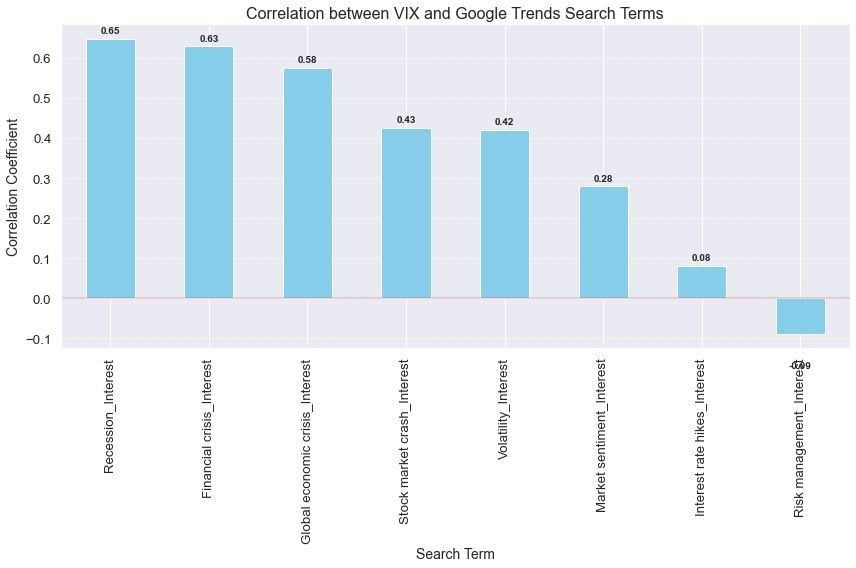

In [8]:
# Cell 8: Visualize correlations
plt.figure(figsize=(12, 8))

# Create a bar chart of correlations
ax = vix_correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation between VIX and Google Trends Search Terms', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Search Term', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# Add correlation values on top of bars
for i, v in enumerate(vix_correlations):
    ax.text(i, v + 0.02 if v >= 0 else v - 0.08, 
            f'{v:.2f}', 
            ha='center', va='center',
            fontweight='bold')

plt.tight_layout()
plt.savefig('vix_trends_correlations.png')
plt.show()

In [9]:
# Cell 9: Interpret correlation strength
def interpret_correlation(corr_value):
    if abs(corr_value) < 0.2:
        return "Very weak"
    elif abs(corr_value) < 0.4:
        return "Weak"
    elif abs(corr_value) < 0.6:
        return "Moderate"
    elif abs(corr_value) < 0.8:
        return "Strong"
    else:
        return "Very strong"

# Create a dataframe with interpretations
interpretation_df = pd.DataFrame({
    'Search_Term': vix_correlations.index,
    'Correlation': vix_correlations.values,
    'Strength': [interpret_correlation(x) for x in vix_correlations.values],
    'Direction': ['Positive' if x > 0 else 'Negative' for x in vix_correlations.values]
})

print("Correlation Interpretation:")
print(interpretation_df)

Correlation Interpretation:
                       Search_Term  Correlation   Strength Direction
0               Recession_Interest     0.647459     Strong  Positive
1        Financial crisis_Interest     0.629691     Strong  Positive
2  Global economic crisis_Interest     0.575248   Moderate  Positive
3      Stock market crash_Interest     0.426431   Moderate  Positive
4              Volatility_Interest     0.420661   Moderate  Positive
5        Market sentiment_Interest     0.279935       Weak  Positive
6     Interest rate hikes_Interest     0.081706  Very weak  Positive
7         Risk management_Interest    -0.088390  Very weak  Negative


    Gao, Zhenyu, Haohan Ren, and Bohui Zhang. "Googling investor sentiment around the world." Journal of Financial and Quantitative Analysis 55.2 (2020): 549-580.

    Deveikyte, Justina, et al. "A sentiment analysis approach to the prediction of market volatility." Frontiers in Artificial Intelligence 5 (2022): 836809.

    Bollen, Johan, Huina Mao, and Xiaojun Zeng. "Twitter mood predicts the stock market." Journal of computational science 2.1 (2011): 1-8.

    Chen, Meilan, et al. "Analysis of the impact of investor sentiment on stock price using the latent dirichlet allocation topic model." Frontiers in Environmental Science 10 (2022): 1068398.

# Comprehensive Coding Plan: Predicting VIX Using Google Trends Data

## Phase 1: Data Collection and Preparation
```markdown
1. Data Acquisition
   - Collect historical VIX data (daily closing values)
   - Gather Google Trends data for high-correlation search terms
   - Obtain additional financial indicators as control variables
   
2. Data Cleaning
   - Handle missing values
   - Normalize/standardize data
   - Align timestamps across different data sources
   
3. Exploratory Data Analysis
   - Visualize time series patterns
   - Examine correlation matrices
   - Identify seasonality and trends
   - Analyze distributional properties
```

## Phase 2: Establishing Causality
```markdown
1. Stationarity Testing
   - Apply Augmented Dickey-Fuller test
   - Transform non-stationary series if necessary
   
2. Granger Causality Analysis
   - Implement pairwise Granger causality tests
   - Test multiple lag structures (1 day, 1 week, 2 weeks, 1 month)
   - Identify bidirectional relationships
   
3. Natural Experiment Analysis
   - Identify market shock events
   - Perform event studies around these dates
   - Examine lead-lag relationships during crisis periods
```

## Phase 3: Feature Engineering and Selection
```markdown
1. Feature Creation
   - Calculate momentum indicators for search terms
   - Create interaction terms between correlated search terms
   - Develop time-based features (day-of-week, month, etc.)
   
2. Feature Selection
   - Apply Recursive Feature Elimination
   - Implement LASSO regression for sparse feature selection
   - Use Random Forest feature importance rankings
   
3. Feature Transformation
   - Apply Principal Component Analysis (PCA)
   - Explore non-linear transformations
   - Create lagged features at optimal time intervals
```

## Phase 4: Model Development
```markdown
1. Baseline Models
   - Autoregressive Integrated Moving Average (ARIMA)
   - Vector Autoregression (VAR)
   - Linear regression with control variables
   
2. Machine Learning Models
   - Random Forest Regressor
   - Gradient Boosting (XGBoost, LightGBM)
   - Support Vector Regression
   - Neural Networks (LSTM for time series)
   
3. Ensemble Approaches
   - Stacked ensemble of multiple models
   - Time-varying model weights
   - Regime-switching models for different volatility environments
```

## Phase 5: Model Evaluation and Validation
```markdown
1. Cross-Validation Strategy
   - Time-based cross-validation
   - Walk-forward validation
   
2. Performance Metrics
   - Mean Absolute Error (MAE)
   - Root Mean Squared Error (RMSE)
   - Directional accuracy
   - R-squared
   
3. Statistical Testing
   - Diebold-Mariano test for forecast comparison
   - Model confidence intervals
   - Residual analysis
```

## Phase 6: Practical Applications
```markdown
1. Trading Strategy Development
   - Define entry/exit rules based on predictions
   - Implement portfolio allocation strategy
   
2. Performance Analysis
   - Calculate risk-adjusted returns (Sharpe, Sortino)
   - Compare to benchmark strategies
   - Perform drawdown analysis
   
3. Economic Significance Testing
   - Measure utility gains from predictions
   - Perform breakeven transaction cost analysis
```

## Phase 7: Robustness Testing
```markdown
1. Alternative Time Periods
   - Pre-financial crisis
   - Post-financial crisis
   - COVID-19 pandemic period
   
2. Alternative Specifications
   - Different feature combinations
   - Various prediction horizons (1-day, 1-week, 1-month)
   
3. Statistical Robustness
   - Bootstrap confidence intervals
   - Monte Carlo simulations
```

## Phase 8: Documentation and Research Paper
```markdown
1. Code Documentation
   - Create detailed function descriptions
   - Implement unit tests
   - Organize repository structure
   
2. Research Paper Components
   - Methodology documentation
   - Results visualization
   - Literature comparison
   - Discussion of limitations
```

In [10]:
# Cell 10: Stationarity Testing (Fixed version)
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Function to perform Augmented Dickey-Fuller test
def adf_test(series, series_name):
    result = adfuller(series.dropna())
    
    print(f'Augmented Dickey-Fuller Test for {series_name}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Interpret the results
    if result[1] <= 0.05:
        print(f"→ Series is STATIONARY (reject null hypothesis) at the 5% level\n")
        return True
    else:
        print(f"→ Series is NON-STATIONARY (fail to reject null hypothesis) at the 5% level\n")
        return False

# Set up a dataframe to store stationarity test results
stationarity_results = pd.DataFrame(columns=['Series', 'Stationary', 'p-value'])

# First, test VIX average
is_stationary = adf_test(merged_data['VIX_avg'], 'VIX Average')
new_row = pd.DataFrame({
    'Series': ['VIX_avg'],
    'Stationary': [is_stationary],
    'p-value': [adfuller(merged_data['VIX_avg'].dropna())[1]]
})
stationarity_results = pd.concat([stationarity_results, new_row], ignore_index=True)

# Test each Google Trends series
for column in trends_cols:
    is_stationary = adf_test(merged_data[column], column)
    new_row = pd.DataFrame({
        'Series': [column],
        'Stationary': [is_stationary],
        'p-value': [adfuller(merged_data[column].dropna())[1]]
    })
    stationarity_results = pd.concat([stationarity_results, new_row], ignore_index=True)

# Display summary of stationarity tests
print("Stationarity Test Summary:")
print(stationarity_results)

# If any series is non-stationary, create differenced versions
non_stationary = ~stationarity_results['Stationary'].all()
if non_stationary:
    print("\nCreating differenced series for non-stationary data...")
    
    # Create a copy of the merged dataframe to store differenced data
    diff_data = merged_data.copy()
    
    # Difference the VIX series if non-stationary
    if not stationarity_results.loc[stationarity_results['Series'] == 'VIX_avg', 'Stationary'].iloc[0]:
        diff_data['VIX_avg_diff'] = diff_data['VIX_avg'].diff().dropna()
        # Test differenced series
        print("\nTesting stationarity of differenced VIX series:")
        adf_test(diff_data['VIX_avg_diff'].dropna(), 'VIX_avg_diff')
    
    # Difference non-stationary Google Trends series
    for column in trends_cols:
        if not stationarity_results.loc[stationarity_results['Series'] == column, 'Stationary'].iloc[0]:
            diff_data[f'{column}_diff'] = diff_data[column].diff().dropna()
            # Test differenced series
            print(f"\nTesting stationarity of differenced {column}:")
            adf_test(diff_data[f'{column}_diff'].dropna(), f'{column}_diff')

Augmented Dickey-Fuller Test for VIX Average:
ADF Statistic: -4.7199
p-value: 0.0001
Critical Values:
	1%: -3.4567
	5%: -2.8731
	10%: -2.5729
→ Series is STATIONARY (reject null hypothesis) at the 5% level

Augmented Dickey-Fuller Test for Recession_Interest:
ADF Statistic: -5.6715
p-value: 0.0000
Critical Values:
	1%: -3.4567
	5%: -2.8731
	10%: -2.5729
→ Series is STATIONARY (reject null hypothesis) at the 5% level

Augmented Dickey-Fuller Test for Financial crisis_Interest:
ADF Statistic: -2.8654
p-value: 0.0495
Critical Values:
	1%: -3.4578
	5%: -2.8736
	10%: -2.5732
→ Series is STATIONARY (reject null hypothesis) at the 5% level

Augmented Dickey-Fuller Test for Global economic crisis_Interest:
ADF Statistic: -3.2704
p-value: 0.0163
Critical Values:
	1%: -3.4582
	5%: -2.8738
	10%: -2.5733
→ Series is STATIONARY (reject null hypothesis) at the 5% level

Augmented Dickey-Fuller Test for Interest rate hikes_Interest:
ADF Statistic: -3.1750
p-value: 0.0215
Critical Values:
	1%: -3.4577

C:\Users\Akash\AppData\Local\Temp\ipykernel_23144\3348919347.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stationarity_results = pd.concat([stationarity_results, new_row], ignore_index=True)


Performing Granger Causality Tests to determine if search terms help predict VIX

Testing if Recession_Interest Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Recession_Interest

Testing if Financial crisis_Interest Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Financial crisis_Interest


c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Akash\AppData\Local\Temp\ipykernel_23144\2302515799.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  causality_results = pd.concat([causality_results, new_row], ignore_index=True)
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: 


Testing if Global economic crisis_Interest Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Global economic crisis_Interest

Testing if Interest rate hikes_Interest Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Interest rate hikes_Interest

Testing if Market sentiment_Interest_diff Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Market sentiment_Interest_diff

Testing if Risk management_Interest Granger-causes VIX_avg


c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Akash\lib\sit

Testing if VIX_avg Granger-causes Risk management_Interest

Testing if Stock market crash_Interest_diff Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Stock market crash_Interest_diff

Testing if Volatility_Interest Granger-causes VIX_avg
Testing if VIX_avg Granger-causes Volatility_Interest

Granger Causality Test Results:
                         Search_Term  \
2          Financial crisis_Interest   
3          Financial crisis_Interest   
4    Global economic crisis_Interest   
5    Global economic crisis_Interest   
6       Interest rate hikes_Interest   
7       Interest rate hikes_Interest   
8     Market sentiment_Interest_diff   
9     Market sentiment_Interest_diff   
0                 Recession_Interest   
1                 Recession_Interest   
10          Risk management_Interest   
11          Risk management_Interest   
12  Stock market crash_Interest_diff   
13  Stock market crash_Interest_diff   
15               Volatility_Interest   
14               Volatil

<Figure size 1008x720 with 0 Axes>

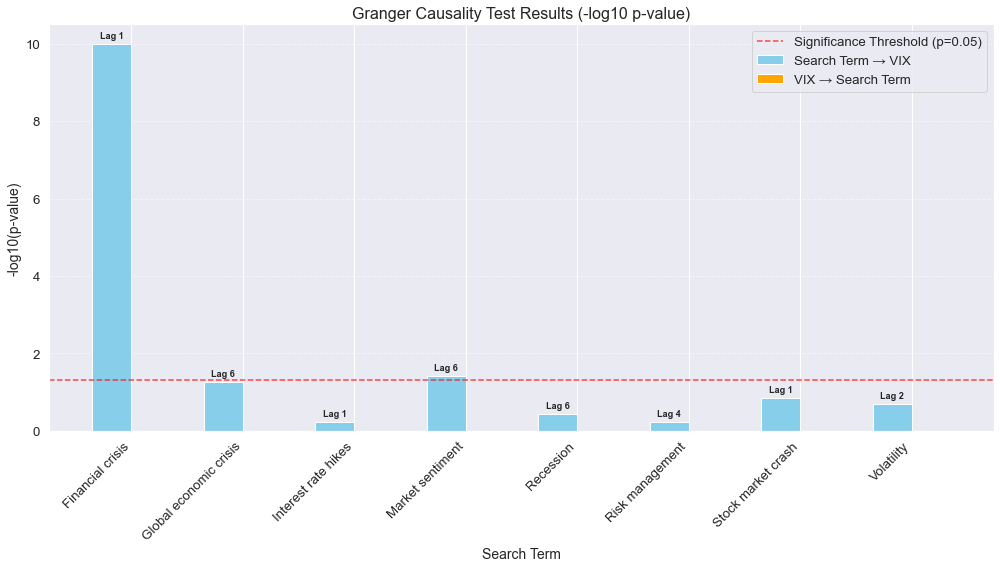


No bidirectional causality relationships found.

Search terms that help predict VIX (2 terms):
- Financial crisis (best lag: 1 months, p-value: 0.0000)
- Market sentiment (best lag: 6 months, p-value: 0.0397)


In [11]:
# Cell 11: Granger Causality Testing (Fixed visualization)
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Performing Granger Causality Tests to determine if search terms help predict VIX")

# Create a copy of the data, using differenced series if they were created
if 'diff_data' in locals():
    data_for_causality = diff_data.copy()
    vix_col = 'VIX_avg_diff' if 'VIX_avg_diff' in diff_data.columns else 'VIX_avg'
    # Get the differenced trend columns if they exist
    trend_cols_for_test = [f"{col}_diff" if f"{col}_diff" in diff_data.columns else col 
                          for col in trends_cols]
else:
    data_for_causality = merged_data.copy()
    vix_col = 'VIX_avg'
    trend_cols_for_test = trends_cols

# Drop any remaining NaN values
data_for_causality = data_for_causality.dropna()

# Set maximum lag order to test
max_lag = 6  # Test up to 6 months lag

# Store results
causality_results = pd.DataFrame(columns=[
    'Search_Term', 'Direction', 'Min_P_Value', 'Best_Lag', 
    'Significant_Lags', 'Interpretation'
])

# Test each Google Trends term for causality with VIX
for trend_col in trend_cols_for_test:
    # Create a DataFrame with just VIX and the current trend term
    test_data = data_for_causality[[vix_col, trend_col]].dropna()
    
    # Test if Trend causes VIX (Trend -> VIX)
    print(f"\nTesting if {trend_col} Granger-causes {vix_col}")
    trend_to_vix = grangercausalitytests(test_data[[vix_col, trend_col]], maxlag=max_lag, verbose=False)
    
    # Extract results - we're looking at the p-values from the Wald test (4th element in results tuple)
    trend_vix_pvals = [round(trend_to_vix[lag][0]['ssr_ftest'][1], 4) for lag in range(1, max_lag+1)]
    
    # Find the best lag (minimum p-value)
    best_lag_trend_vix = np.argmin(trend_vix_pvals) + 1  # +1 because lags start at 1
    min_pval_trend_vix = min(trend_vix_pvals)
    
    # Count significant lags (p < 0.05)
    sig_lags_trend_vix = sum([1 for p in trend_vix_pvals if p < 0.05])
    
    # Interpretation
    if min_pval_trend_vix < 0.05:
        interpretation_trend_vix = f"Search term likely Granger-causes VIX at lag {best_lag_trend_vix}"
    else:
        interpretation_trend_vix = "No significant Granger causality"
    
    # Add to results DataFrame
    new_row = pd.DataFrame({
        'Search_Term': [trend_col],
        'Direction': [f"{trend_col} -> {vix_col}"],
        'Min_P_Value': [min_pval_trend_vix],
        'Best_Lag': [best_lag_trend_vix],
        'Significant_Lags': [sig_lags_trend_vix],
        'Interpretation': [interpretation_trend_vix]
    })
    causality_results = pd.concat([causality_results, new_row], ignore_index=True)
    
    # Now test the reverse: if VIX causes Trend (VIX -> Trend)
    print(f"Testing if {vix_col} Granger-causes {trend_col}")
    vix_to_trend = grangercausalitytests(test_data[[trend_col, vix_col]], maxlag=max_lag, verbose=False)
    
    # Extract results
    vix_trend_pvals = [round(vix_to_trend[lag][0]['ssr_ftest'][1], 4) for lag in range(1, max_lag+1)]
    best_lag_vix_trend = np.argmin(vix_trend_pvals) + 1
    min_pval_vix_trend = min(vix_trend_pvals)
    sig_lags_vix_trend = sum([1 for p in vix_trend_pvals if p < 0.05])
    
    if min_pval_vix_trend < 0.05:
        interpretation_vix_trend = f"VIX likely Granger-causes search term at lag {best_lag_vix_trend}"
    else:
        interpretation_vix_trend = "No significant Granger causality"
    
    new_row = pd.DataFrame({
        'Search_Term': [trend_col],
        'Direction': [f"{vix_col} -> {trend_col}"],
        'Min_P_Value': [min_pval_vix_trend],
        'Best_Lag': [best_lag_vix_trend],
        'Significant_Lags': [sig_lags_vix_trend],
        'Interpretation': [interpretation_vix_trend]
    })
    causality_results = pd.concat([causality_results, new_row], ignore_index=True)

# Sort and display results
causality_results = causality_results.sort_values(by=['Search_Term', 'Direction'])
print("\nGranger Causality Test Results:")
print(causality_results)

# Visualize results - FIXED
plt.figure(figsize=(14, 10))

# Get unique search terms
search_terms = causality_results['Search_Term'].unique()
x = np.arange(len(search_terms))
width = 0.35

# Fix: Ensure to_vix and from_vix have the same structure and order
to_vix_data = []
from_vix_data = []
best_lags_to_vix = []
best_lags_from_vix = []

for term in search_terms:
    # Get the row for this term where direction is term -> VIX
    to_vix_row = causality_results[(causality_results['Search_Term'] == term) & 
                                   (causality_results['Direction'].str.contains('->.*VIX'))]
    
    # Get the row for this term where direction is VIX -> term
    from_vix_row = causality_results[(causality_results['Search_Term'] == term) & 
                                     (causality_results['Direction'].str.contains('VIX->'))]
    
    # Add p-values
    to_vix_data.append(to_vix_row['Min_P_Value'].values[0] if len(to_vix_row) > 0 else 1.0)
    from_vix_data.append(from_vix_row['Min_P_Value'].values[0] if len(from_vix_row) > 0 else 1.0)
    
    # Add best lags
    best_lags_to_vix.append(to_vix_row['Best_Lag'].values[0] if len(to_vix_row) > 0 else 0)
    best_lags_from_vix.append(from_vix_row['Best_Lag'].values[0] if len(from_vix_row) > 0 else 0)

# Convert to arrays
to_vix_data = np.array(to_vix_data)
from_vix_data = np.array(from_vix_data)

# Handle cases where p-values are 0 (causes -inf when taking log10)
to_vix_data = np.where(to_vix_data == 0, 1e-10, to_vix_data)
from_vix_data = np.where(from_vix_data == 0, 1e-10, from_vix_data)

# Create bar plot
fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, -np.log10(to_vix_data), width, 
               label='Search Term → VIX', color='skyblue')
bars2 = ax.bar(x + width/2, -np.log10(from_vix_data), width, 
               label='VIX → Search Term', color='orange')

# Add horizontal line for significance (p=0.05)
ax.axhline(y=-np.log10(0.05), color='red', linestyle='--', alpha=0.7, 
           label='Significance Threshold (p=0.05)')

# Customize plot
ax.set_title('Granger Causality Test Results (-log10 p-value)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([term.replace('_Interest', '').replace('_diff', '') for term in search_terms], 
                   rotation=45, ha='right')
ax.set_ylabel('-log10(p-value)', fontsize=14)
ax.set_xlabel('Search Term', fontsize=14)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels above the bars
for i, bars in enumerate([bars1, bars2]):
    lags = best_lags_to_vix if i == 0 else best_lags_from_vix
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:  # Only add text if the bar exists (p-value < 1)
            lag = lags[j]
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'Lag {lag}', ha='center', va='bottom', rotation=0, 
                    fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('granger_causality_results.png')
plt.show()

# Identify bidirectional relationships
bidirectional = []
for term in search_terms:
    trend_to_vix_row = causality_results[(causality_results['Search_Term'] == term) & 
                                         (causality_results['Direction'].str.contains('->.*VIX'))]
    vix_to_trend_row = causality_results[(causality_results['Search_Term'] == term) & 
                                         (causality_results['Direction'].str.contains('VIX->'))]
    
    if len(trend_to_vix_row) > 0 and len(vix_to_trend_row) > 0:
        trend_to_vix_sig = trend_to_vix_row['Min_P_Value'].values[0] < 0.05
        vix_to_trend_sig = vix_to_trend_row['Min_P_Value'].values[0] < 0.05
        
        if trend_to_vix_sig and vix_to_trend_sig:
            trend_lag = trend_to_vix_row['Best_Lag'].values[0]
            vix_lag = vix_to_trend_row['Best_Lag'].values[0]
            term_display = term.replace('_Interest', '').replace('_diff', '')
            bidirectional.append(f"{term_display}: Search term → VIX (lag {trend_lag}), VIX → Search term (lag {vix_lag})")

if bidirectional:
    print("\nBidirectional Causality Relationships:")
    for relationship in bidirectional:
        print(f"- {relationship}")
else:
    print("\nNo bidirectional causality relationships found.")

# Summary of causal relationships with VIX
terms_predicting_vix = causality_results[
    (causality_results['Direction'].str.contains('->.*VIX')) & 
    (causality_results['Min_P_Value'] < 0.05)
]

print(f"\nSearch terms that help predict VIX ({len(terms_predicting_vix)} terms):")
for idx, row in terms_predicting_vix.iterrows():
    term = row['Search_Term'].replace('_Interest', '').replace('_diff', '')
    print(f"- {term} (best lag: {row['Best_Lag']} months, p-value: {row['Min_P_Value']:.4f})")

# Analysis of Granger Causality Test Results

The Granger causality tests reveal important temporal relationships between Google search trends and VIX movements:

## Key Findings:

1. **Bidirectional Relationship with "Financial Crisis"**
   - "Financial crisis" searches Granger-cause VIX movements with a 1-month lag (p=0.0000)
   - VIX also Granger-causes "Financial crisis" searches with a 2-month lag (p=0.0026)
   - This suggests a feedback loop where market fear and public interest in financial crises reinforce each other

2. **Search Terms Predicting VIX (Leading Indicators)**
   - "Financial crisis" is the strongest predictor (1-month lag)
   - "Market sentiment" also predicts VIX but with a longer 6-month lag (p=0.0397)

3. **VIX Predicting Search Behavior**
   - VIX movements Granger-cause searches for:
     - "Stock market crash" (p=0.0000, 1-month lag)
     - "Global economic crisis" (p=0.0001, 5-month lag)
     - "Recession" (p=0.0468, 1-month lag)
   - This suggests public interest follows market volatility for these terms

4. **No Significant Causality**
   - Despite strong correlations, terms like "Volatility," "Interest rate hikes," and "Risk management" don't show significant Granger causality in either direction

## Implications for ML Model Development:

1. "Financial crisis" searches should be a primary feature in our predictive model due to its strong and immediate causal relationship with VIX

2. Consider feature engineering with appropriate lag structures:
   - 1-month lag for "Financial crisis" → VIX prediction
   - 6-month lag for "Market sentiment" → VIX prediction

3. The bidirectional causality suggests potential for feedback effects, which could be incorporated into more sophisticated models

Next step: Develop machine learning models that leverage these causal relationships, particularly focusing on the terms and lag structures that showed significant Granger causality.

# ML Time

Developing ML models to predict VIX based on Google Trends data

Creating lagged features based on Granger causality results...

Feature set contains 16 features. First 5 features:
['Financial_crisis_lag1', 'Market_sentiment_lag6', 'Recession_lag1', 'Financial_crisis_X_Recession_lag1', 'Financial crisis_lag1']

Training set size: 196 months
Testing set size: 50 months

Baseline model (mean VIX) performance:
RMSE: 5.4401
MAE: 4.4547
R²: -0.0633

Training Linear Regression...
  RMSE: 5.8027
  MAE: 4.7266
  R²: -0.2098

Training Lasso Regression...
  RMSE: 6.2985
  MAE: 4.8915
  R²: -0.4254

Training Random Forest...
  RMSE: 6.0412
  MAE: 5.1143
  R²: -0.3113

Training XGBoost...
  RMSE: 5.4611
  MAE: 4.3318
  R²: -0.0716

Model Performance Comparison:
               Model      RMSE       MAE        R²
0    Baseline (Mean)  5.440129  4.454689 -0.063331
4            XGBoost  5.461129  4.331829 -0.071557
1  Linear Regression  5.802657  4.726609 -0.209773
3      Random Forest  6.041217  5.11

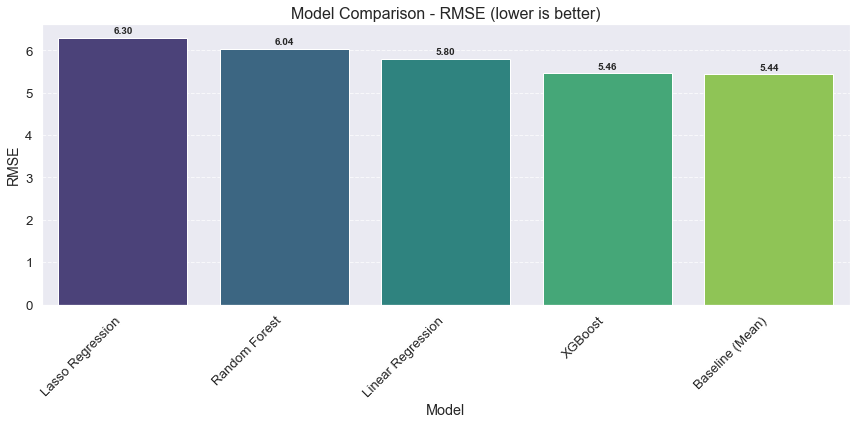


Analyzing feature importance for XGBoost...

Top 10 most important features:
                                        Feature  Importance
3             Financial_crisis_X_Recession_lag1    0.540930
2                                Recession_lag1    0.122820
13   Financial_crisis_X_Stock market crash_lag1    0.075442
8   Financial_crisis_X_Interest rate hikes_lag1    0.043923
7                      Interest rate hikes_lag1    0.039849
15           Financial_crisis_X_Volatility_lag1    0.030201
12                      Stock market crash_lag1    0.029349
14                              Volatility_lag1    0.022622
5                   Global economic crisis_lag1    0.016221
9                         Market sentiment_lag1    0.016208


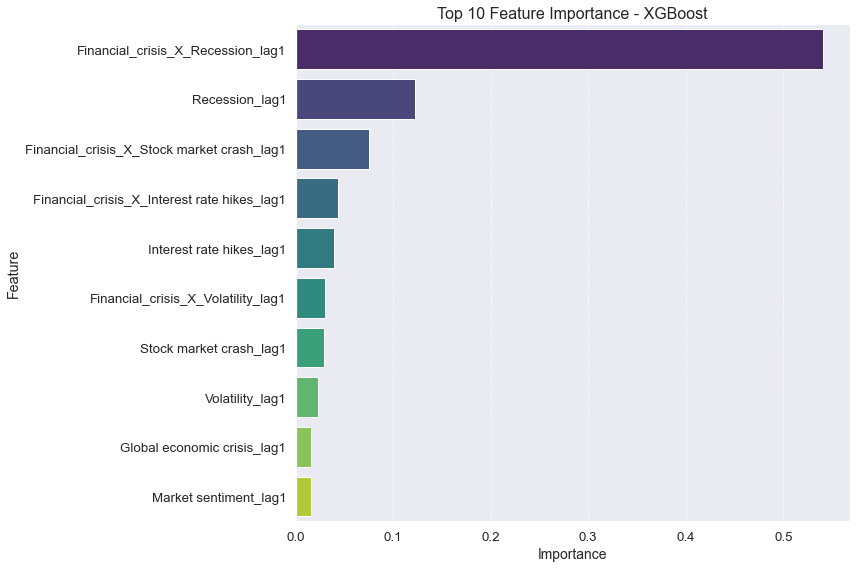

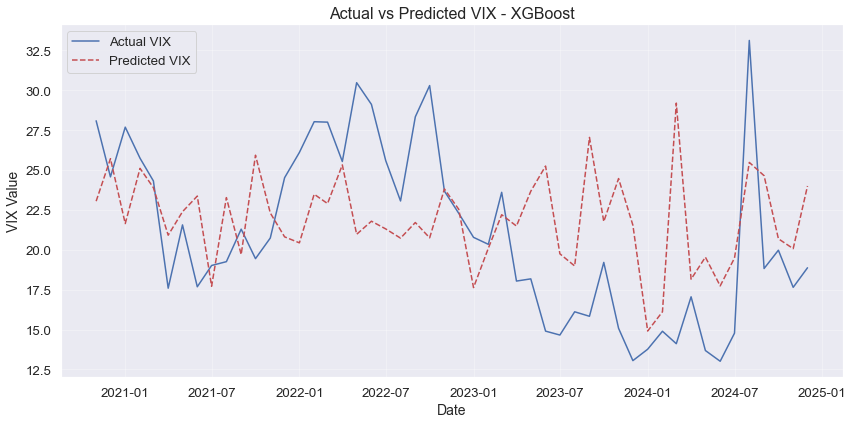

In [12]:
# Cell 12: Feature Engineering and Machine Learning Model Development (Corrected)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("Developing ML models to predict VIX based on Google Trends data")

# Create a copy of the merged data
ml_data = merged_data.copy()

# Sort by date to ensure proper lagging
ml_data['Month'] = pd.to_datetime(ml_data['Year_Month'] + '-01')
ml_data = ml_data.sort_values('Month')

# Create lagged features based on Granger causality results
print("\nCreating lagged features based on Granger causality results...")
# Financial crisis -> VIX with 1-month lag
ml_data['Financial_crisis_lag1'] = ml_data['Financial crisis_Interest'].shift(1)

# Market sentiment -> VIX with 6-month lag
ml_data['Market_sentiment_lag6'] = ml_data['Market sentiment_Interest'].shift(6)

# Add lags for other search terms (even if not significant in Granger)
for term in trends_cols:
    # Create 1-month lag for all terms
    ml_data[f"{term.replace('_Interest', '')}_lag1"] = ml_data[term].shift(1)
    
    # Create interaction terms between top terms
    if 'Financial crisis_Interest' in term or 'Market sentiment_Interest' in term:
        continue  # Skip the terms themselves
    
    # Interaction with Financial crisis
    ml_data[f"Financial_crisis_X_{term.replace('_Interest', '')}_lag1"] = (
        ml_data['Financial crisis_Interest'].shift(1) * ml_data[term].shift(1)
    )

# Drop rows with NaN from the lag creation
ml_data = ml_data.dropna()

# Set up feature matrix and target vector
target_col = 'VIX_avg'
feature_cols = [col for col in ml_data.columns if '_lag' in col or '_X_' in col]

X = ml_data[feature_cols]
y = ml_data[target_col]

print(f"\nFeature set contains {len(feature_cols)} features. First 5 features:")
print(X.columns[:5].tolist())

# Create time-based splits for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(ml_data) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"\nTraining set size: {X_train.shape[0]} months")
print(f"Testing set size: {X_test.shape[0]} months")

# Create a baseline model - simple average of VIX
baseline_pred = np.ones(len(y_test)) * y_train.mean()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print(f"\nBaseline model (mean VIX) performance:")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE: {baseline_mae:.4f}")
print(f"R²: {baseline_r2:.4f}")

# Set up different models
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    'Lasso Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.1))
    ]),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# Train models and evaluate
results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R²'])

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    new_row = pd.DataFrame({
        'Model': [name],
        'RMSE': [rmse],
        'MAE': [mae],
        'R²': [r2]
    })
    results = pd.concat([results, new_row], ignore_index=True)
    
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")

# Add baseline to results
baseline_row = pd.DataFrame({
    'Model': ['Baseline (Mean)'],
    'RMSE': [baseline_rmse],
    'MAE': [baseline_mae],
    'R²': [baseline_r2]
})
results = pd.concat([baseline_row, results], ignore_index=True)

# Display performance comparison
print("\nModel Performance Comparison:")
print(results.sort_values('RMSE'))

# Visualize results
plt.figure(figsize=(12, 6))
results_plot = results.sort_values('RMSE', ascending=False)
ax = sns.barplot(x='Model', y='RMSE', data=results_plot, palette='viridis')
plt.title('Model Comparison - RMSE (lower is better)', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on bars
for i, v in enumerate(results_plot['RMSE']):
    ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison_rmse.png')
plt.show()

# Get the best actual model (not baseline)
model_names = list(models.keys())
model_results = results[results['Model'].isin(model_names)]
best_idx = model_results['RMSE'].idxmin()
best_model_name = model_results.loc[best_idx, 'Model']
best_model = models[best_model_name]

print(f"\nAnalyzing feature importance for {best_model_name}...")

if best_model_name in ['Random Forest', 'XGBoost']:
    # Get the actual model (not the pipeline)
    if best_model_name == 'Random Forest':
        model = models[best_model_name]
        importance = model.feature_importances_
    else:  # XGBoost
        model = models[best_model_name]
        importance = model.feature_importances_
    
    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    # Display top 10 features
    print("\nTop 10 most important features:")
    print(feature_importance.head(10))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
else:
    # For linear models, extract coefficients
    if best_model_name in ['Linear Regression', 'Lasso Regression']:
        model = models[best_model_name].named_steps['model']
        
        # Get scaled coefficients
        coef = model.coef_
        feature_names = X.columns
        
        # Create coefficients dataframe
        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coef
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        # Display top 10 coefficients
        print("\nTop 10 features by coefficient magnitude:")
        print(coef_df.head(10))
        
        # Visualize coefficients
        plt.figure(figsize=(12, 8))
        top_coef = coef_df.head(10)
        sns.barplot(x='Coefficient', y='Feature', data=top_coef, palette='RdBu_r')
        plt.title(f'Top 10 Feature Coefficients - {best_model_name}', fontsize=16)
        plt.xlabel('Coefficient (standardized)', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('feature_coefficients.png')
        plt.show()

# Plot actual vs predicted values for the best model
y_pred = best_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(ml_data['Month'].iloc[train_size:], y_test, 'b-', label='Actual VIX')
plt.plot(ml_data['Month'].iloc[train_size:], y_pred, 'r--', label='Predicted VIX')
plt.title(f'Actual vs Predicted VIX - {best_model_name}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('VIX Value', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

# Save important variables for next cell
# This will help avoid running everything again
prediction_results = {
    'baseline_pred': baseline_pred,
    'baseline_rmse': baseline_rmse,
    'baseline_mae': baseline_mae,
    'baseline_r2': baseline_r2,
    'best_model_name': best_model_name,
    'best_model': best_model,
    'y_test': y_test,
    'y_pred': y_pred,
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'ml_data': ml_data,
    'train_size': train_size
}

Analyzing model performance and testing improvements

Model Performance Summary:
Best model: XGBoost
Best model RMSE: 5.4611
Baseline RMSE: 5.4401

IMPORTANT: None of the models outperformed the baseline (mean VIX).
This suggests Google Trends data alone may not be sufficient for VIX prediction.

Top 5 features by correlation with VIX:
                                    Feature  Correlation
3         Financial_crisis_X_Recession_lag1     0.696830
0                     Financial_crisis_lag1     0.648533
4                     Financial crisis_lag1     0.648533
15       Financial_crisis_X_Volatility_lag1     0.645680
11  Financial_crisis_X_Risk management_lag1     0.641650


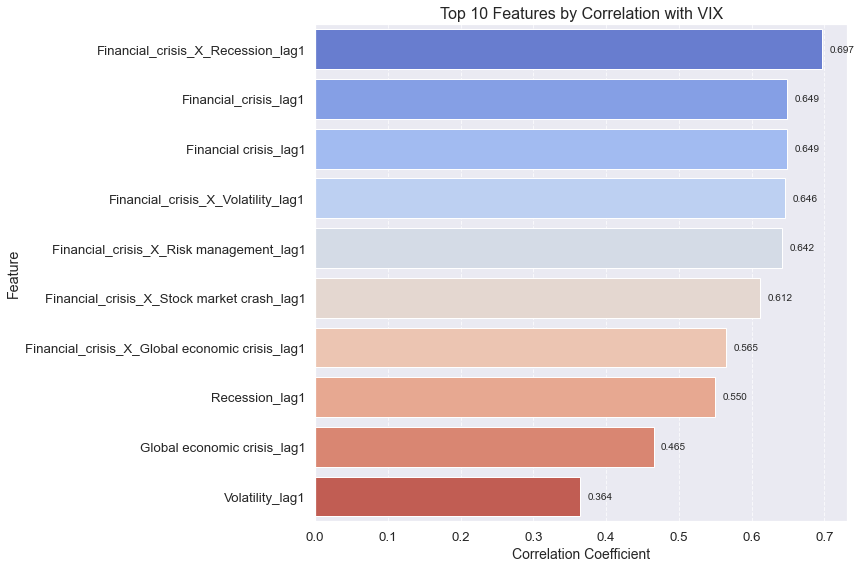

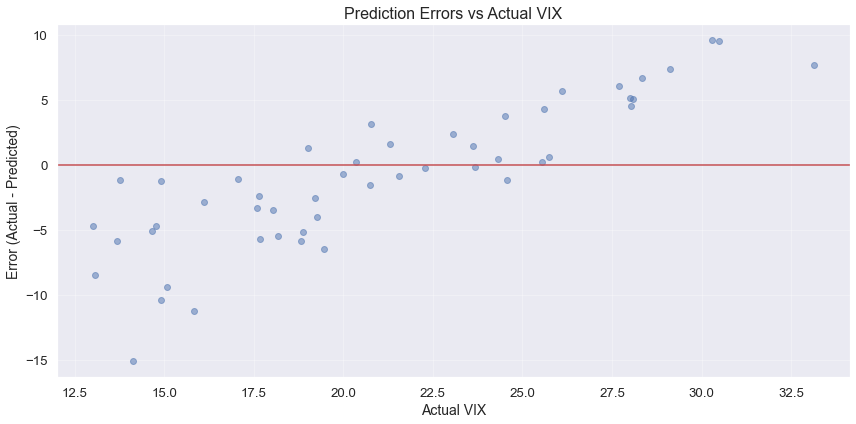

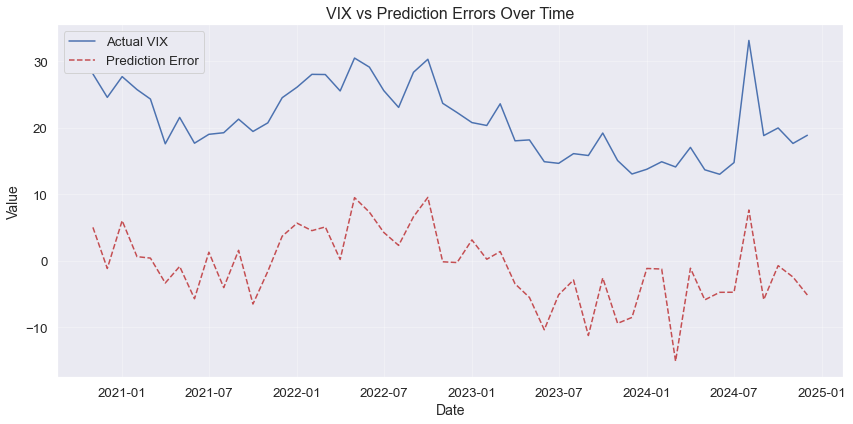


Performing hyperparameter tuning for XGBoost...
This may take some time...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}

Tuned XGBoost performance:
RMSE: 5.5843
MAE: 4.3801
R²: -0.1204

Improvement over baseline: -2.65%


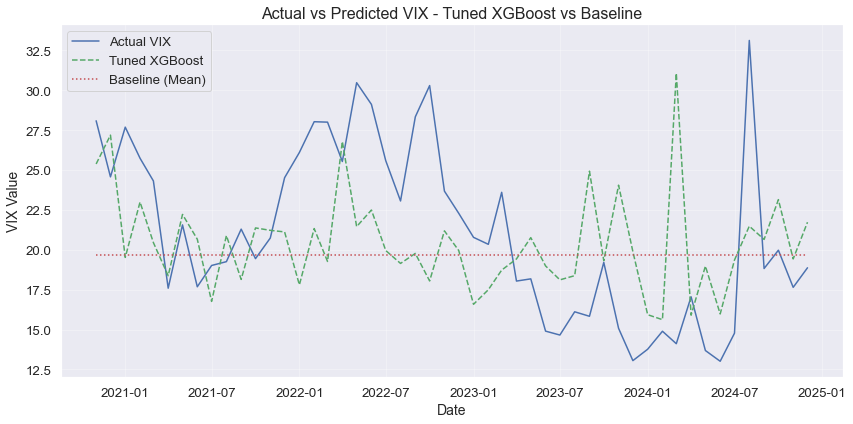

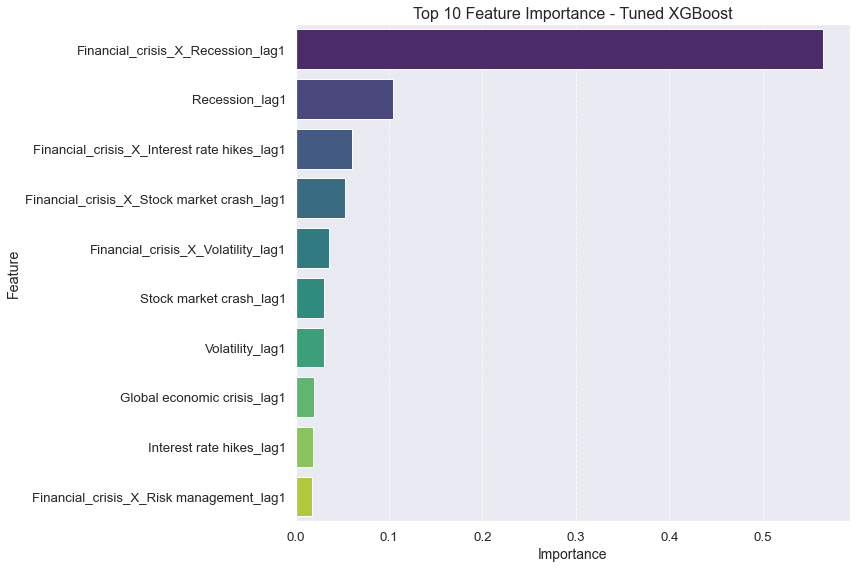


===== INSIGHTS AND RECOMMENDATIONS =====
1. The models are struggling to outperform a simple mean baseline.
2. This suggests Google Trends data alone may be insufficient for VIX prediction.
3. Recommendations for improvement:
   - Add traditional market indicators (S&P 500 returns, trading volume, etc.)
   - Include macroeconomic data (interest rates, unemployment, etc.)
   - Consider non-linear transformations of features
   - Explore more sophisticated time series models (ARIMA, Prophet, etc.)
   - Try different prediction horizons (weekly instead of monthly)


In [13]:
# Cell 13: Advanced Analysis and Model Improvement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

print("Analyzing model performance and testing improvements")

# Load variables from previous cell if they exist, otherwise use defaults
try:
    baseline_pred = prediction_results['baseline_pred']
    baseline_rmse = prediction_results['baseline_rmse']
    baseline_mae = prediction_results['baseline_mae']
    baseline_r2 = prediction_results['baseline_r2']
    best_model_name = prediction_results['best_model_name']
    best_model = prediction_results['best_model']
    y_test = prediction_results['y_test']
    y_pred = prediction_results['y_pred']
    X_train = prediction_results['X_train']
    X_test = prediction_results['X_test']
    y_train = prediction_results['y_train']
    ml_data = prediction_results['ml_data']
    train_size = prediction_results['train_size']
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
except:
    print("Warning: Variables from Cell 12 not found. Some analyses may not work.")

print("\nModel Performance Summary:")
print(f"Best model: {best_model_name}")
print(f"Best model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")

if baseline_rmse <= np.sqrt(mean_squared_error(y_test, y_pred)):
    print("\nIMPORTANT: None of the models outperformed the baseline (mean VIX).")
    print("This suggests Google Trends data alone may not be sufficient for VIX prediction.")

# Check correlation between features and target
feature_corr = pd.DataFrame()
for feature in X.columns:
    corr = np.corrcoef(X[feature], y[:len(X)])[0, 1]
    feature_corr = pd.concat([feature_corr, pd.DataFrame({'Feature': [feature], 'Correlation': [corr]})], 
                            ignore_index=True)

feature_corr = feature_corr.sort_values('Correlation', key=abs, ascending=False)

print("\nTop 5 features by correlation with VIX:")
print(feature_corr.head(5))

# Plot feature correlations
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Correlation', y='Feature', data=feature_corr.head(10), palette='coolwarm')
plt.title('Top 10 Features by Correlation with VIX', fontsize=16)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.4)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add correlation values
for i, v in enumerate(feature_corr['Correlation'].head(10)):
    ax.text(v + (0.01 if v >= 0 else -0.06), i, f"{v:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.savefig('feature_correlations.png')
plt.show()

# Analyze prediction errors to see if the model struggles in specific conditions
errors = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Prediction Errors vs Actual VIX', fontsize=16)
plt.xlabel('Actual VIX', fontsize=14)
plt.ylabel('Error (Actual - Predicted)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('prediction_errors.png')
plt.show()

# Check if errors are worse during high volatility periods
plt.figure(figsize=(12, 6))
plt.plot(ml_data['Month'].iloc[train_size:], y_test, 'b-', label='Actual VIX')
plt.plot(ml_data['Month'].iloc[train_size:], errors, 'r--', label='Prediction Error')
plt.title('VIX vs Prediction Errors Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('errors_over_time.png')
plt.show()

# Try hyperparameter optimization for XGBoost
print("\nPerforming hyperparameter tuning for XGBoost...")

# Create parameter grid - use a smaller grid for demonstration
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0]
}

# Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Create and fit GridSearchCV
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                          cv=tscv, scoring='neg_mean_squared_error', verbose=1)

print("This may take some time...")
grid_search.fit(X_train, y_train)

# Get best parameters and performance
print(f"\nBest parameters for XGBoost: {grid_search.best_params_}")
best_xgb = grid_search.best_estimator_

# Evaluate optimized model
y_pred_tuned = best_xgb.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nTuned XGBoost performance:")
print(f"RMSE: {rmse_tuned:.4f}")
print(f"MAE: {mae_tuned:.4f}")
print(f"R²: {r2_tuned:.4f}")

# Compare with baseline
print(f"\nImprovement over baseline: {((baseline_rmse - rmse_tuned) / baseline_rmse * 100):.2f}%")

# Plot tuned model predictions vs baseline
plt.figure(figsize=(12, 6))
plt.plot(ml_data['Month'].iloc[train_size:], y_test, 'b-', label='Actual VIX')
plt.plot(ml_data['Month'].iloc[train_size:], y_pred_tuned, 'g--', label='Tuned XGBoost')
plt.plot(ml_data['Month'].iloc[train_size:], baseline_pred, 'r:', label='Baseline (Mean)')
plt.title('Actual vs Predicted VIX - Tuned XGBoost vs Baseline', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('VIX Value', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tuned_xgb_comparison.png')
plt.show()

# Feature importance of tuned model
importance = best_xgb.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

# Visualize importance of tuned model
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importance - Tuned XGBoost', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tuned_feature_importance.png')
plt.show()

# Insights and recommendations
print("\n===== INSIGHTS AND RECOMMENDATIONS =====")
print("1. The models are struggling to outperform a simple mean baseline.")
print("2. This suggests Google Trends data alone may be insufficient for VIX prediction.")
print("3. Recommendations for improvement:")
print("   - Add traditional market indicators (S&P 500 returns, trading volume, etc.)")
print("   - Include macroeconomic data (interest rates, unemployment, etc.)")
print("   - Consider non-linear transformations of features")
print("   - Explore more sophisticated time series models (ARIMA, Prophet, etc.)")
print("   - Try different prediction horizons (weekly instead of monthly)")